In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from xgboost import XGBClassifier
from sklearn.inspection import partial_dependence

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [4]:
# define three-year mortalitty status
df_train.loc[:,'MORTSTAT3Y'] = np.where((df_train["MORTSTAT"] == 1) & (df_train["TIMETOEVENT"] <= 3), 1, 0)
df_test.loc[:,'MORTSTAT3Y'] = np.where((df_test["MORTSTAT"] == 1) & (df_test["TIMETOEVENT"] <= 3), 1, 0)

In [5]:
# select features and target
X_train = df_train.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_train = df_train['MORTSTAT3Y']

X_test = df_test.drop(columns=['MORTSTAT3Y', 'TIMETOEVENT', 'MORTSTAT'])
y_test_ = df_test['MORTSTAT3Y']

In [6]:
# XGBC

In [7]:
xgbc = XGBClassifier(objective='binary:logistic', random_state=42,
                     n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.5, colsample_bytree=0.8)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

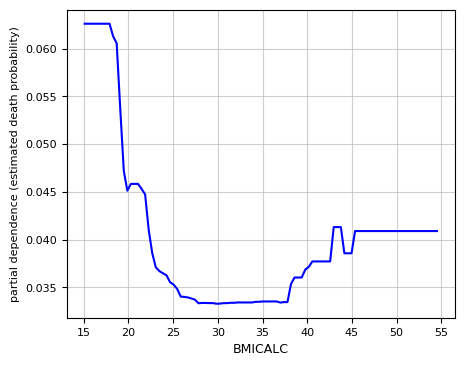

In [8]:
features = 'BMICALC'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

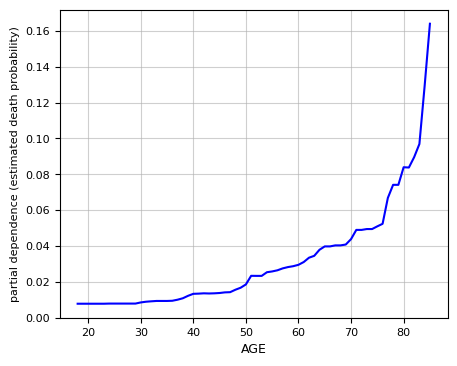

In [9]:
features = 'AGE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

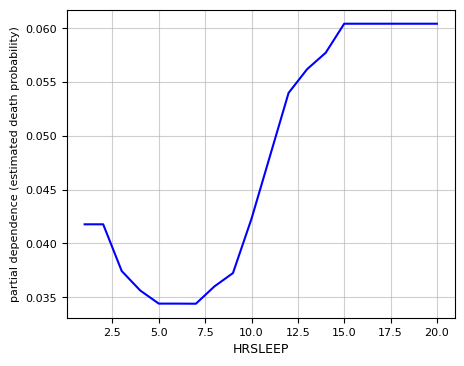

In [10]:
features = 'HRSLEEP'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color='blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

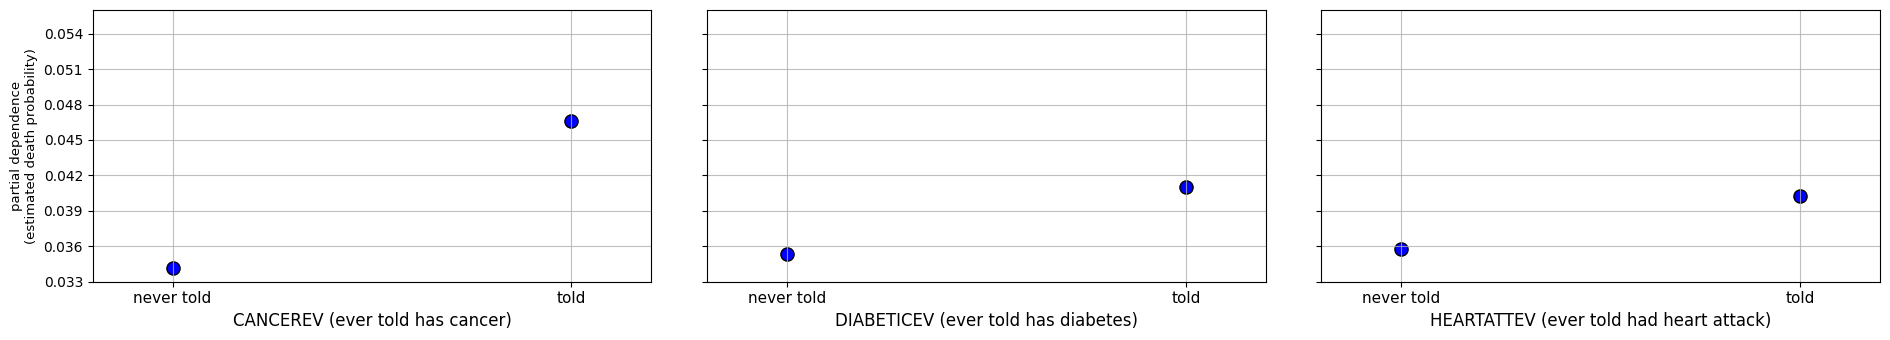

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(19, 3.5), sharey=True)  

# ---plot---
features = 'CANCEREV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[0].set_xlabel('CANCEREV (ever told has cancer)', fontsize=12)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[0].set_xlim(0.8, 2.2)  
axes[0].set_ylim(0.033, 0.056) 
y_ticks = np.arange(0.033, 0.056, 0.003)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=9.5)


# ---plot---
features = 'DIABETICEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[1].set_xlabel('DIABETICEV (ever told has diabetes)', fontsize=12)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[1].set_xlim(0.8, 2.2) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'HEARTATTEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[2].set_xlabel('HEARTATTEV (ever told had heart attack)', fontsize=12)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[2].set_xlim(0.8, 2.2)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  
plt.savefig('pdp_phy1.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

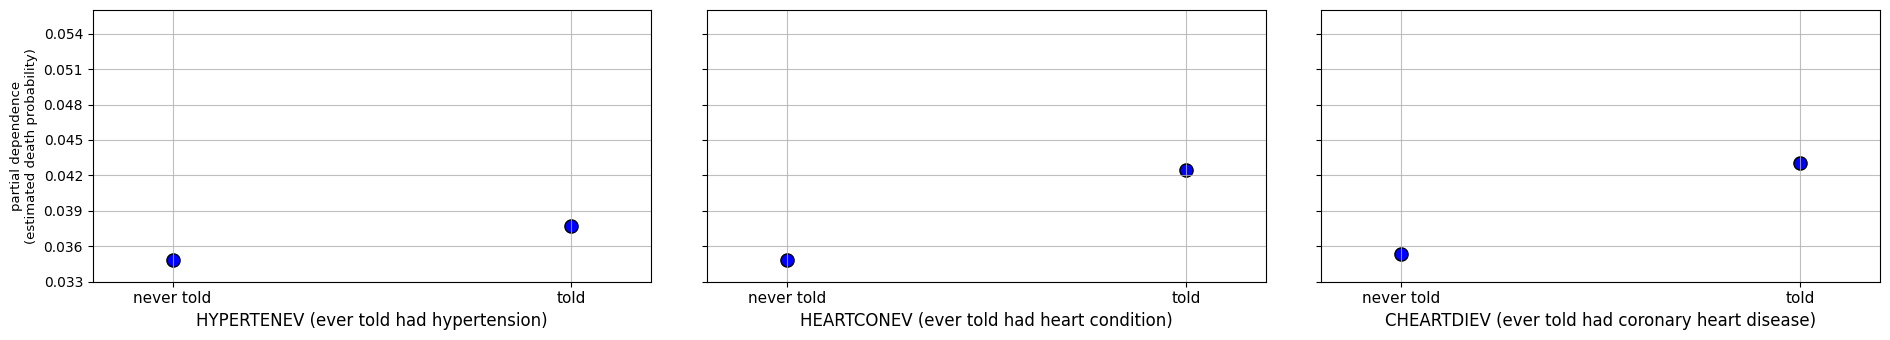

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(19, 3.5), sharey=True)  

# ---plot---
features = 'HYPERTENEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[0].set_xlabel('HYPERTENEV (ever told had hypertension)', fontsize=12)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[0].set_xlim(0.8, 2.2)  
axes[0].set_ylim(0.033, 0.056) 
y_ticks = np.arange(0.033, 0.056, 0.003)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=9.5)

# ---plot---
features = 'HEARTCONEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[1].set_xlabel('HEARTCONEV (ever told had heart condition)', fontsize=12)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[1].set_xlim(0.8, 2.2) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'CHEARTDIEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[2].set_xlabel('CHEARTDIEV (ever told had coronary heart disease)', fontsize=12)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[2].set_xlim(0.8, 2.2)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  
plt.savefig('pdp_phy2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

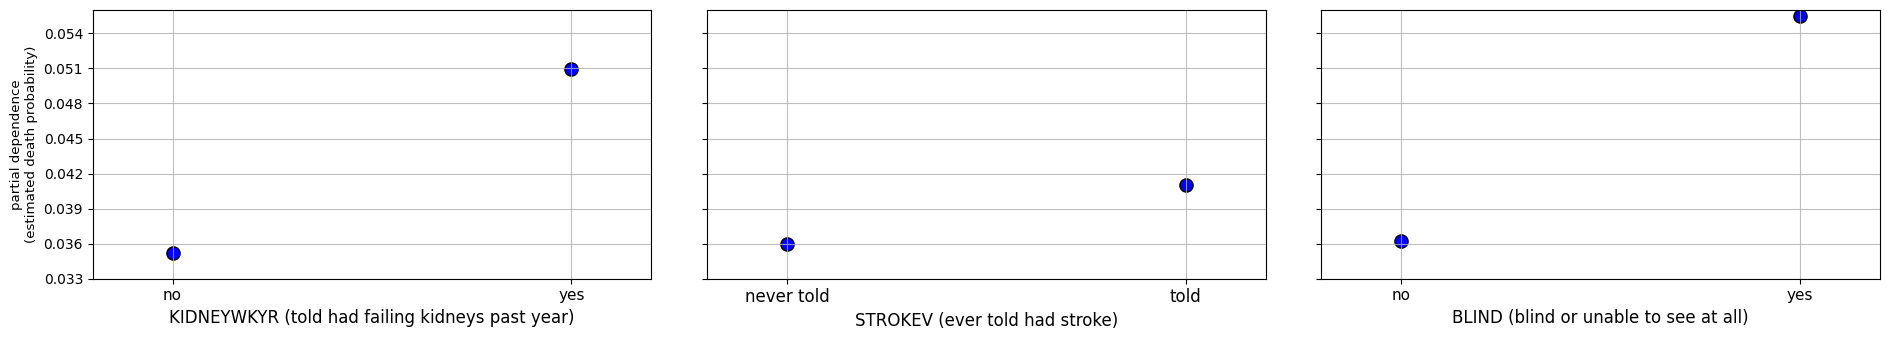

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(19, 3.5), sharey=True)  

# ---plot---
features = 'KIDNEYWKYR'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[0].set_xlabel('KIDNEYWKYR (told had failing kidneys past year)', fontsize=12)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[0].set_xlim(0.8, 2.2)
axes[0].set_ylim(0.033, 0.056) 
y_ticks = np.arange(0.033, 0.056, 0.003)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=9.6)


# ---plot---
features =  'STROKEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[1].set_xlabel('STROKEV (ever told had stroke)', fontsize=12)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=12)  
axes[1].set_xlim(0.8, 2.2) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'BLIND'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[2].set_xlabel('BLIND (blind or unable to see at all)', fontsize=12)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[2].set_xlim(0.8, 2.2)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1) 

plt.savefig('pdp_phy3.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

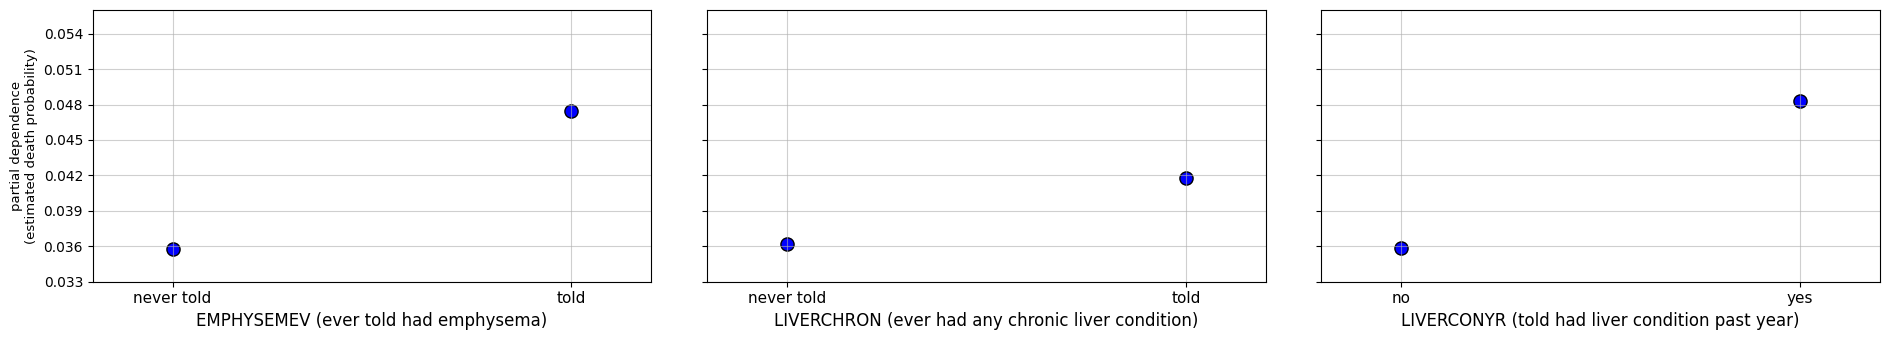

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(19, 3.5), sharey=True)  

# ---plot---
features = 'EMPHYSEMEV'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[0].set_xlabel('EMPHYSEMEV (ever told had emphysema)', fontsize=12)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[0].set_xlim(0.8, 2.2)
axes[0].set_ylim(0.033, 0.056) 
y_ticks = np.arange(0.033, 0.056, 0.003)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.6) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=9.5)


# ---plot---
features = 'LIVERCHRON'
custom_labels = {1: "never told", 2: "told"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[1].set_xlabel('LIVERCHRON (ever had any chronic liver condition)', fontsize=12)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[1].set_xlim(0.8, 2.2) 
axes[1].grid(alpha=0.6)

# ---plot---
features = 'LIVERCONYR'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=90, edgecolor='black', linewidth=1)
axes[2].set_xlabel('LIVERCONYR (told had liver condition past year)', fontsize=12)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[2].set_xlim(0.8, 2.2)  
axes[2].grid(alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

plt.savefig('pdp_phy4.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# health insurance

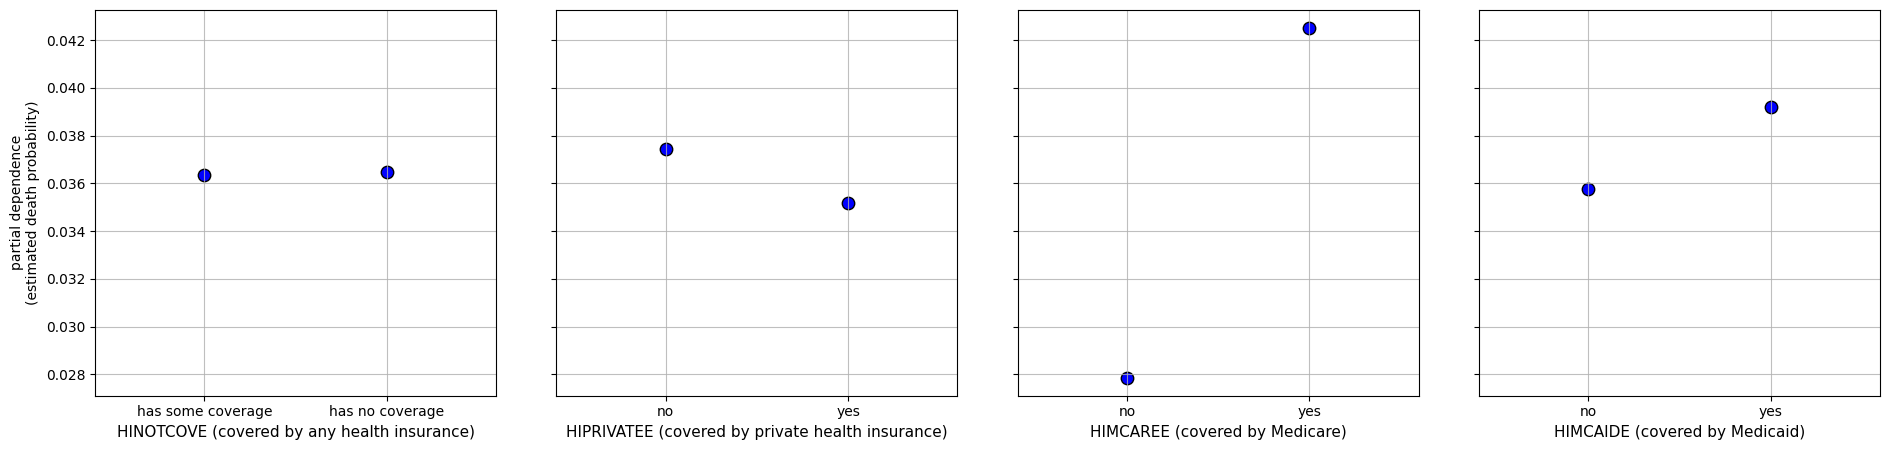

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(19, 4.6), sharey=True)  

# ---plot---
features = 'HINOTCOVE'
custom_labels = {1: "has some coverage", 2: "has no coverage"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[0].set_xlabel('HINOTCOVE (covered by any health insurance)', fontsize=11)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=10)  
axes[0].set_xlim(0.4, 2.6) 
y_ticks = np.arange(0.02, 0.056, 0.002)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'HIPRIVATEE'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[1].set_xlabel('HIPRIVATEE (covered by private health insurance)', fontsize=11)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=10)  
axes[1].set_xlim(0.4, 2.6) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'HIMCAREE'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[2].set_xlabel('HIMCAREE (covered by Medicare)', fontsize=11)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=10)  
axes[2].set_xlim(0.4, 2.6)   
axes[2].grid(alpha=0.8)

# ---plot---
features = 'HIMCAIDE'
custom_labels = {1: "no", 2: "yes"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[3].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[3].set_xlabel('HIMCAIDE (covered by Medicaid)', fontsize=11)
axes[3].set_xticks(ticks=list(custom_labels.keys()))
axes[3].set_xticklabels(list(custom_labels.values()), fontsize=10)  
axes[3].set_xlim(0.4, 2.6)  
axes[3].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

plt.savefig('pdp_ins.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

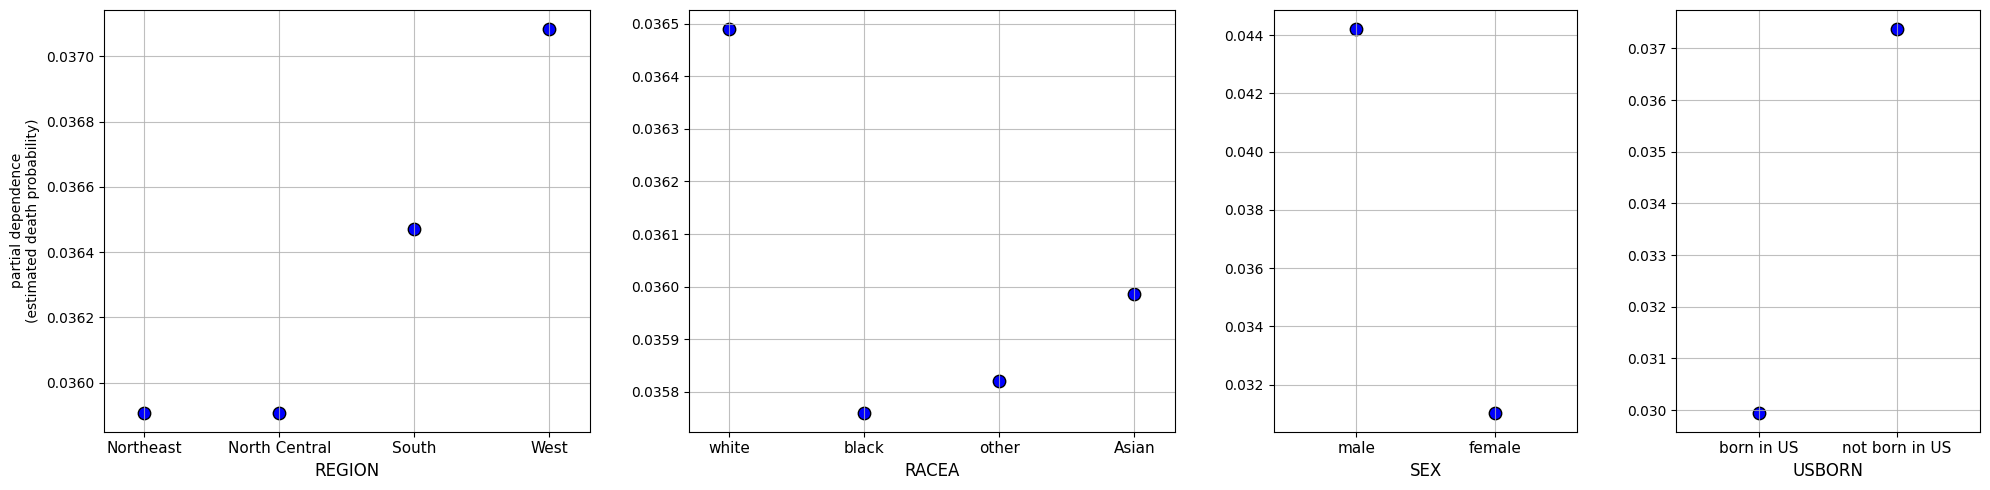

In [76]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5),  gridspec_kw={'width_ratios':[1.6, 1.6, 1, 1]}) 

# ---plot---
features = 'REGION'
custom_labels = {1: "Northeast", 2: "North Central", 3: "South", 4: "West"}
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[0].set_xlabel('REGION', fontsize=12)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[0].set_xlim(0.7, 4.3) 
axes[0].grid(alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'RACEA'
custom_labels = {1: "white", 2: "black", 3: "other", 4: "Asian"}  
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[1].set_xlabel(features, fontsize=12)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[1].set_xlim(0.7, 4.3) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'SEX'
custom_labels = {1: "male", 2: "female"}  
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[2].set_xlabel(features, fontsize=12)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[2].set_xlim(0.4, 2.6)  
axes[2].grid(alpha=0.8)

# ---plot---
features = 'USBORN'
custom_labels = {10: "born in US", 20: "not born in US"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[3].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[3].set_xlabel(features, fontsize=12)
axes[3].set_xticks(ticks=list(custom_labels.keys()))
axes[3].set_xticklabels(list(custom_labels.values()), fontsize=11)  
axes[3].set_xlim(4, 26)  
axes[3].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

plt.savefig('pdp_demo.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

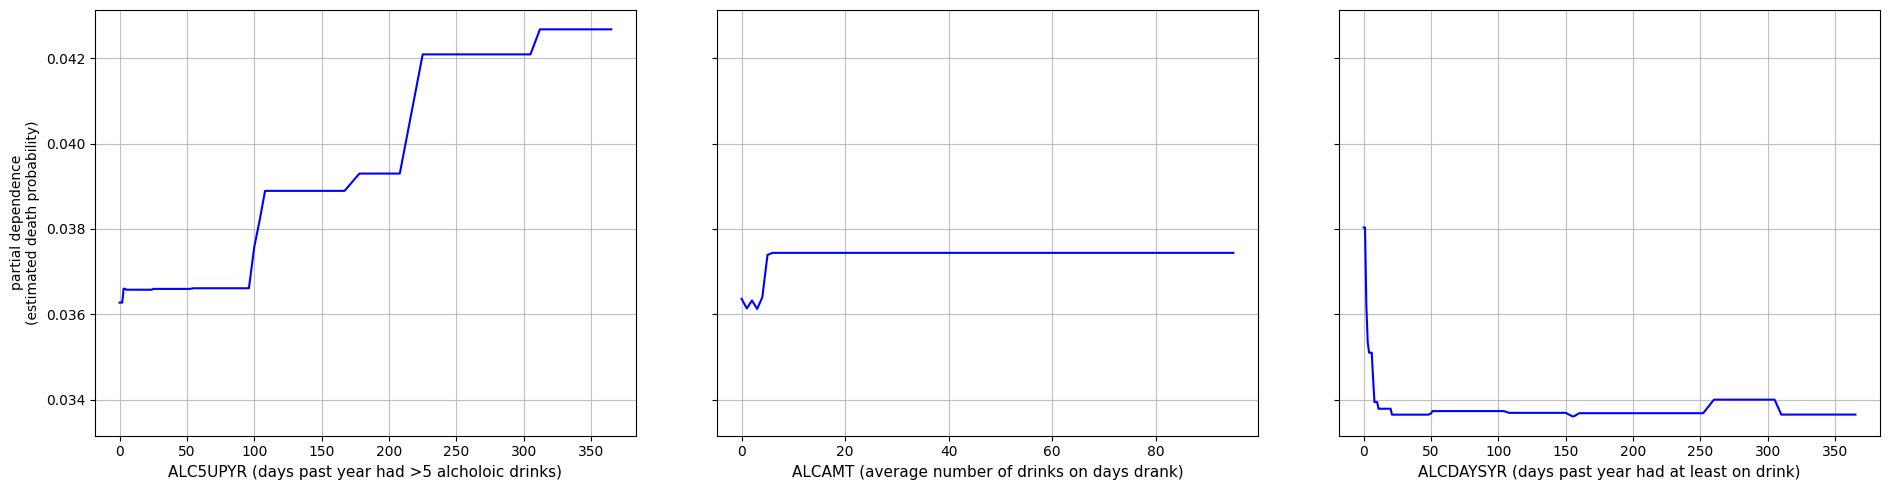

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)  

# ---plot---
features = 'ALC5UPYR'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].plot(x_values, average_values, color='blue')
axes[0].set_xlabel('ALC5UPYR (days past year had >5 alcholoic drinks)', fontsize=11)
y_ticks = np.arange(0.02, 0.056, 0.002)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'ALCAMT'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].plot(x_values, average_values, color='blue')
axes[1].set_xlabel('ALCAMT (average number of drinks on days drank)', fontsize=11)
axes[1].grid(alpha=0.8)

# ---plot---
features = 'ALCDAYSYR'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].plot(x_values, average_values, color='blue')
axes[2].set_xlabel('ALCDAYSYR (days past year had at least on drink)', fontsize=11)   
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

plt.savefig('pdp_alh_cig.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

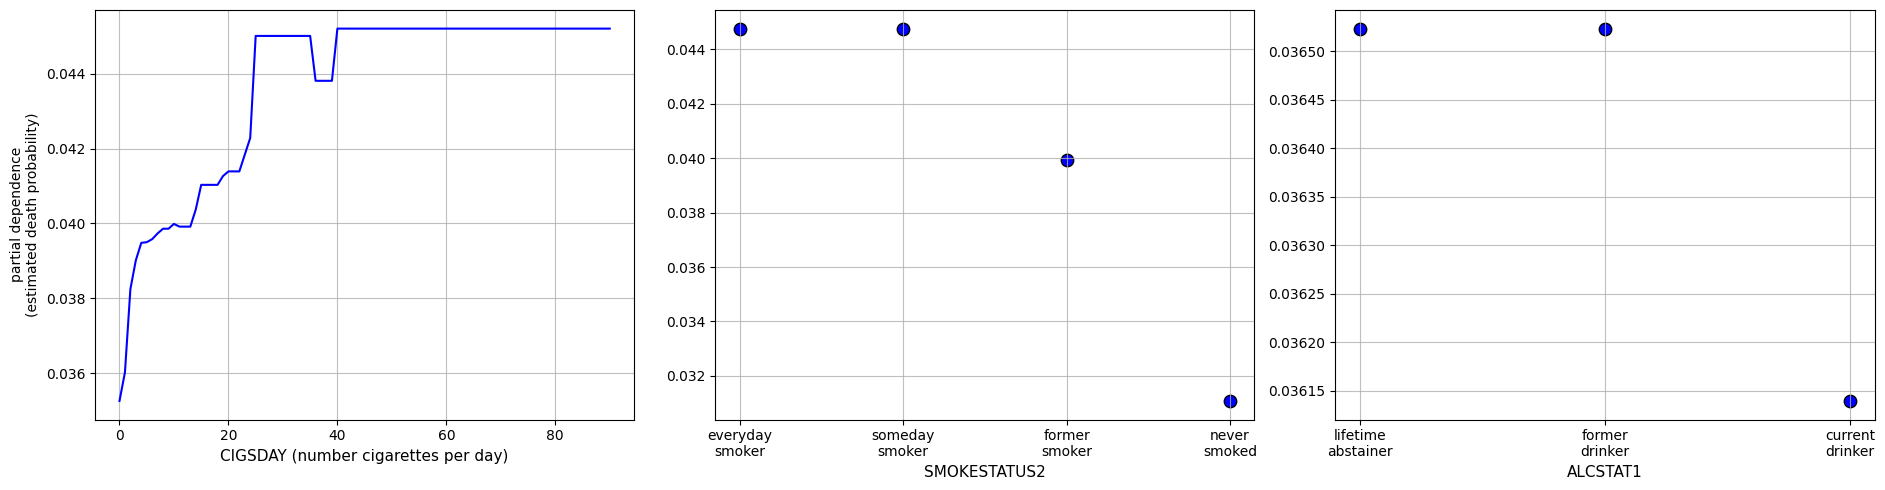

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5))  

# ---plot---
features = 'CIGSDAY'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].plot(x_values, average_values, color='blue')
axes[0].set_xlabel('CIGSDAY (number cigarettes per day)', fontsize=11) 
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'SMOKESTATUS2'
original_categories = [11, 12, 20, 30]  
mapped_positions = np.arange(len(original_categories))  #
custom_labels = ["everyday\nsmoker", "someday\nsmoker", "former\nsmoker", "never\nsmoked"] 

pdp = partial_dependence(xgbc, X_test, features=[features], grid_resolution=100,
                         percentiles=(0,1), method='brute', response_method='predict_proba')
# map x_values to new positions
x_values = [mapped_positions[original_categories.index(x)] for x in pdp['grid_values'][0]]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[1].set_xlabel('SMOKESTATUS2', fontsize=11)
axes[1].set_xticks(mapped_positions) 
axes[1].set_xticklabels(custom_labels, fontsize=10)  
axes[1].grid(alpha=0.8)

# ---plot---
features = 'ALCSTAT1'
custom_labels = {1: "lifetime\nabstainer", 2: "former\ndrinker", 3: "current\ndrinker"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[2].set_xlabel('ALCSTAT1', fontsize=11)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=10)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

plt.savefig('pdp_alh_cig2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

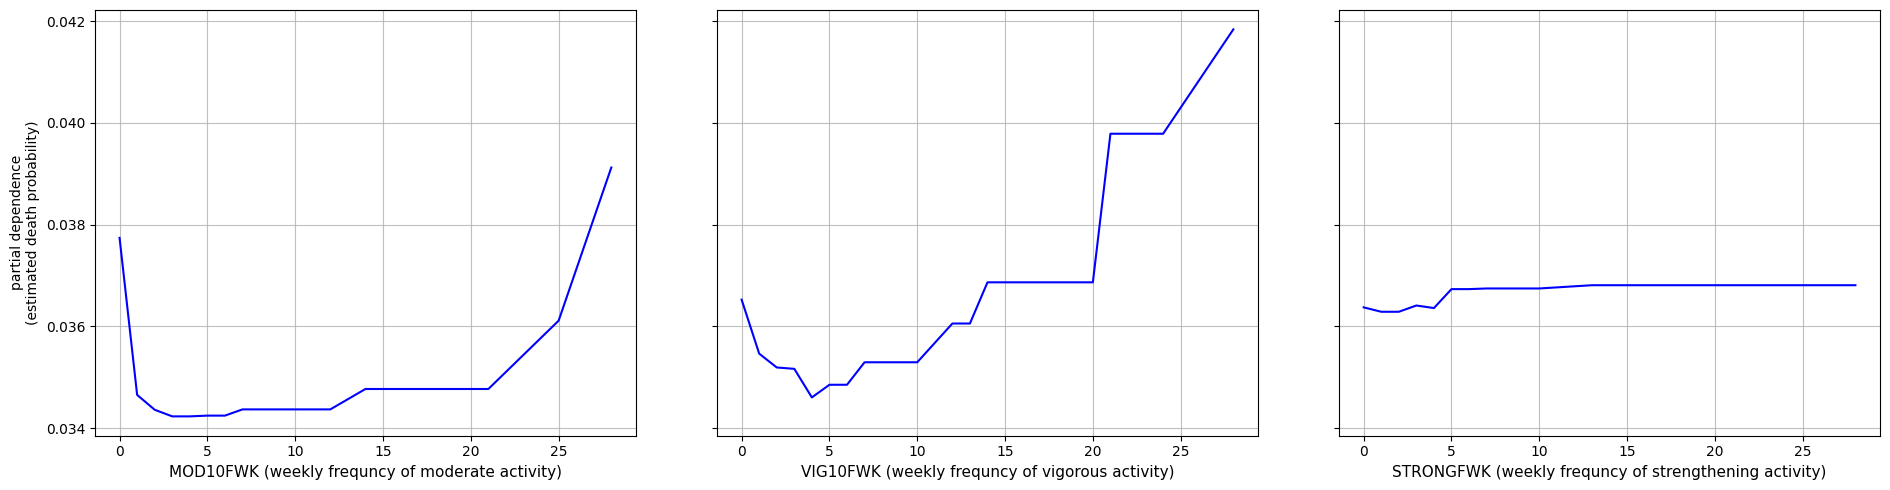

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)  

# ---plot---
features = 'MOD10FWK'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].plot(x_values, average_values, color='blue')
axes[0].set_xlabel('MOD10FWK (weekly frequncy of moderate activity)', fontsize=11)
y_ticks = np.arange(0.02, 0.056, 0.002)  
axes[0].set_yticks(y_ticks)  
axes[0].grid(axis='both', alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'VIG10FWK'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].plot(x_values, average_values, color='blue')
axes[1].set_xlabel('VIG10FWK (weekly frequncy of vigorous activity)', fontsize=11)
axes[1].grid(alpha=0.8)

# ---plot---
features = 'STRONGFWK'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].plot(x_values, average_values, color='blue')
axes[2].set_xlabel('STRONGFWK (weekly frequncy of strengthening activity)', fontsize=11)   
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

plt.savefig('pdp_fwk.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

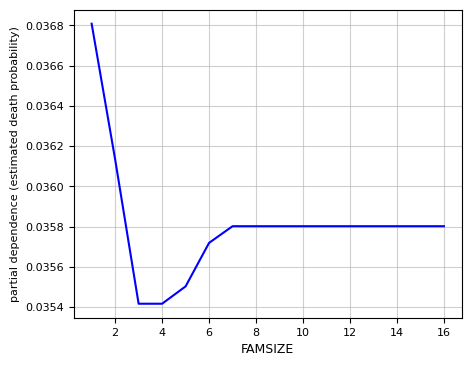

In [21]:
features = 'FAMSIZE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color= 'blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

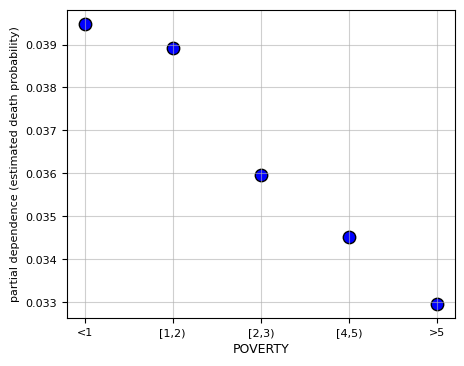

In [22]:
features = 'POVERTY'

custom_labels = {1: "<1", 2: "[1,2)", 3: "[2,3)", 4: "[4,5)", 5: ">5"} 

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0.8, 5.2)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

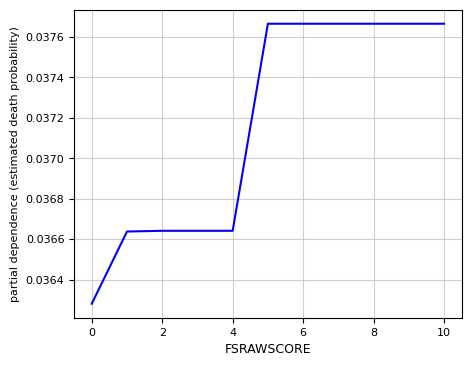

In [23]:
features = 'FSRAWSCORE'

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.plot(x_values, average_values, color= 'blue')
plt.xlabel(features, fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

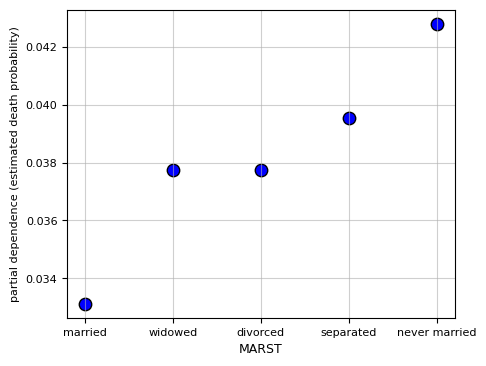

In [24]:
features = 'MARST'

custom_labels = {10: "married", 20: "widowed", 30: "divorced", 40: "separated", 50: "never married"}  

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(5, 4))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(8, 52)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

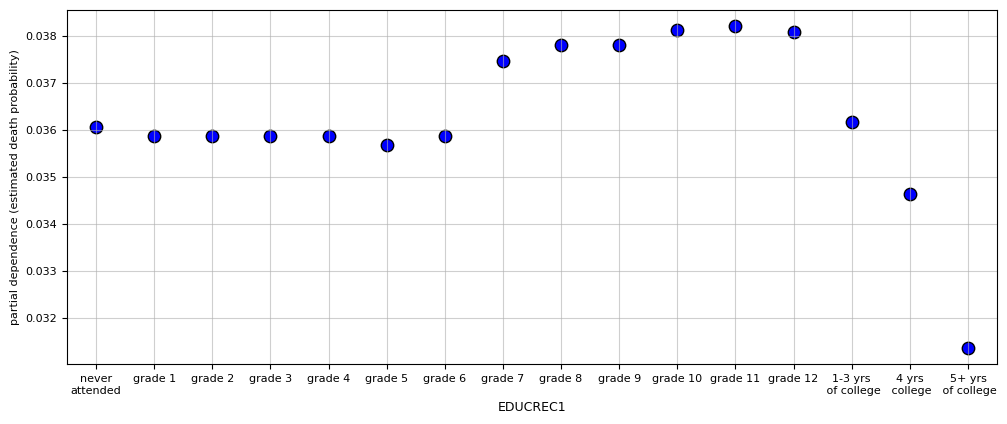

In [25]:
features = 'EDUCREC1'

custom_labels = {
    1: 'never\nattended',
    2: 'grade 1',
    3: 'grade 2',
    4: 'grade 3',
    5: 'grade 4',
    6: 'grade 5',
    7: 'grade 6',
    8: 'grade 7',
    9: 'grade 8',
    10: 'grade 9',
    11: 'grade 10',
    12: 'grade 11',
    13: 'grade 12',
    14: '1-3 yrs\n of college',
    15: '4 yrs\n college',
    16: '5+ yrs\n of college'
}

# compute the PD
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

# extract the values for plotting
x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]

plt.figure(figsize=(12, 4.6))
plt.scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)  
plt.xlabel(features, fontsize=9)
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()), fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0.5, 16.5)
plt.ylabel('partial dependence (estimated death probability)', fontsize=8)
plt.grid(alpha=0.6)
plt.savefig(f"pdp_{features}.jpg", format="jpg", dpi=300)  
plt.show()

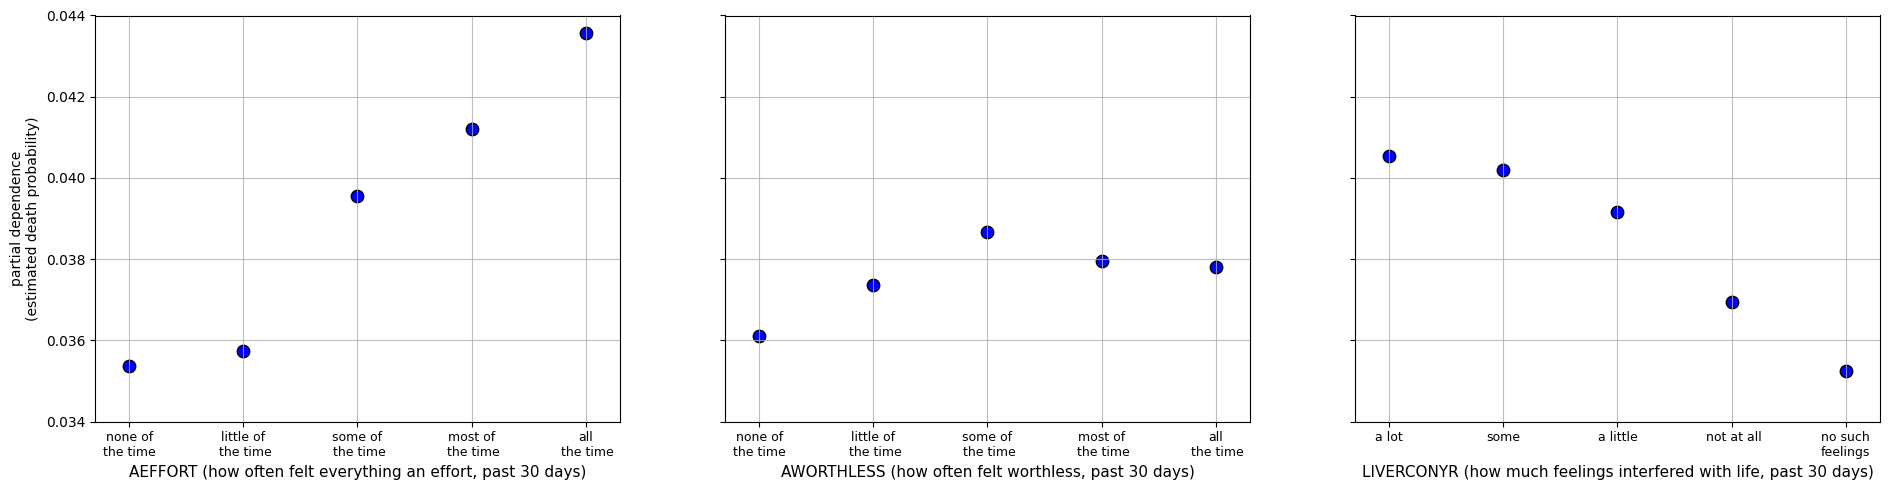

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)  

# ---plot---
features = 'AEFFORT'
custom_labels = {0: "none of\nthe time", 1: "little of\n the time", 2: 'some of\n the time', 3: 'most of\n the time', 4: 'all\n the time'} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[0].set_xlabel('AEFFORT (how often felt everything an effort, past 30 days)', fontsize=11)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[0].set_xlim(-0.3, 4.3)
axes[0].set_ylim(0.034, 0.044)
axes[0].grid(alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'AWORTHLESS'
custom_labels = {0: "none of\nthe time", 1: "little of\n the time", 2: 'some of\n the time', 3: 'most of\n the time', 4: 'all\n the time'} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[1].set_xlabel('AWORTHLESS (how often felt worthless, past 30 days)', fontsize=11)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[1].set_xlim(-0.3, 4.3) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'AFEELINT1MO'
custom_labels = {1: "a lot", 2: "some", 3: "a little", 4: " not at all", 5: "no such\nfeelings"} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[2].set_xlabel('LIVERCONYR (how much feelings interfered with life, past 30 days)', fontsize=11)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[2].set_xlim(0.7, 5.3)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig('pdp_mh.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

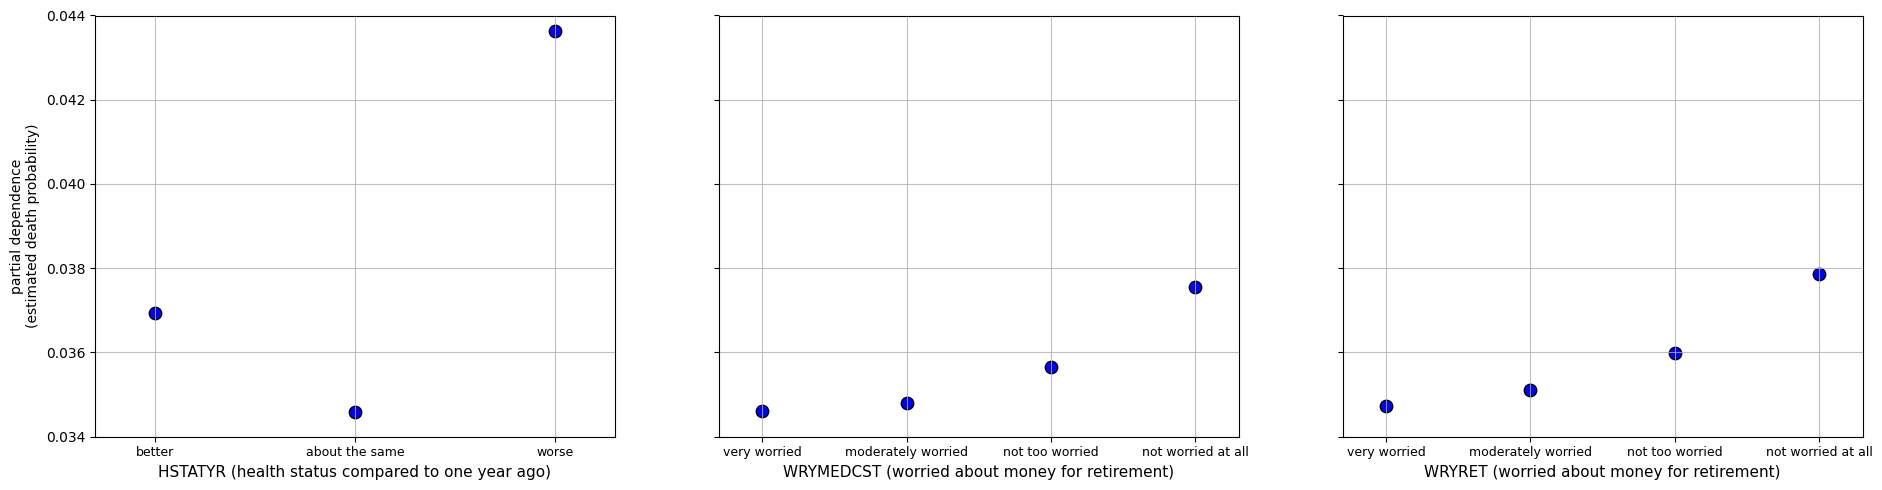

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)  

# ---plot---
features = 'HSTATYR'
custom_labels = {1: "better", 2: "about the same", 3: 'worse'} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[0].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[0].set_xlabel('HSTATYR (health status compared to one year ago)', fontsize=11)
axes[0].set_xticks(ticks=list(custom_labels.keys()))
axes[0].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[0].set_xlim(0.7, 3.3)
axes[0].set_ylim(0.034, 0.044)
axes[0].grid(alpha=0.8) 
axes[0].set_ylabel('partial dependence\n(estimated death probability)', fontsize=10)


# ---plot---
features = 'WRYMEDCST'
custom_labels = {1: "very worried", 2: "moderately worried", 3: 'not too worried', 4: 'not worried at all'} 
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[1].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[1].set_xlabel('WRYMEDCST (worried about money for retirement)', fontsize=11)
axes[1].set_xticks(ticks=list(custom_labels.keys()))
axes[1].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[1].set_xlim(0.7, 4.3) 
axes[1].grid(alpha=0.8)

# ---plot---
features = 'WRYRET'
pdp = partial_dependence(xgbc, X_test, features=features, grid_resolution=100, percentiles=(0,1), method='brute', response_method='predict_proba')

x_values = pdp['grid_values'][0]
average_values = pdp['average'][0]
axes[2].scatter(x_values, average_values, color='blue', s=80, edgecolor='black', linewidth=1)
axes[2].set_xlabel('WRYRET (worried about money for retirement)', fontsize=11)
axes[2].set_xticks(ticks=list(custom_labels.keys()))
axes[2].set_xticklabels(list(custom_labels.values()), fontsize=9)  
axes[2].set_xlim(0.7, 4.3)  
axes[2].grid(alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig('pdp_mh0.png', format='png', dpi=300, bbox_inches='tight')
plt.show()